In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
Weather = pd.read_csv('Summary of Weather.csv')

# Copy the dataset to a new DataFrame
climate = pd.DataFrame(Weather)

# Drop unnecessary columns
to_drop = ['Precip', 'STA', 'Date', 'WindGustSpd', 'Snowfall', 'PoorWeather', 'PRCP', 'DR', 'SPD', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE']
climate.drop(to_drop, inplace=True, axis=1)

# Drop rows with missing values
climate.dropna(subset=['MaxTemp', 'MinTemp', 'MeanTemp', 'MAX', 'MIN', 'MEA'], inplace=True)


<ipython-input-2-0619bb9de93a>:9: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  Weather = pd.read_csv('Summary of Weather.csv')


<ipython-input-3-62f3ea9be1cf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(climate['MaxTemp'], kde=False)


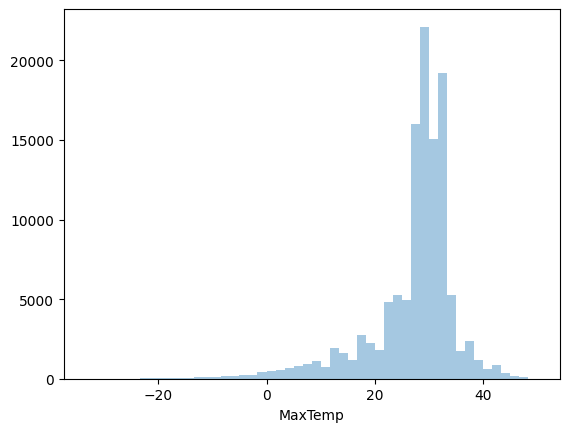

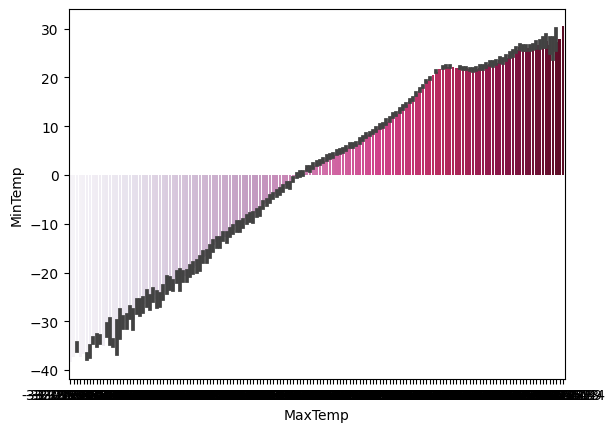

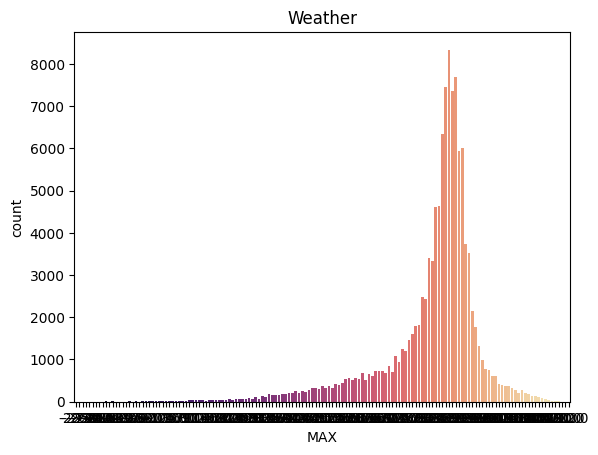

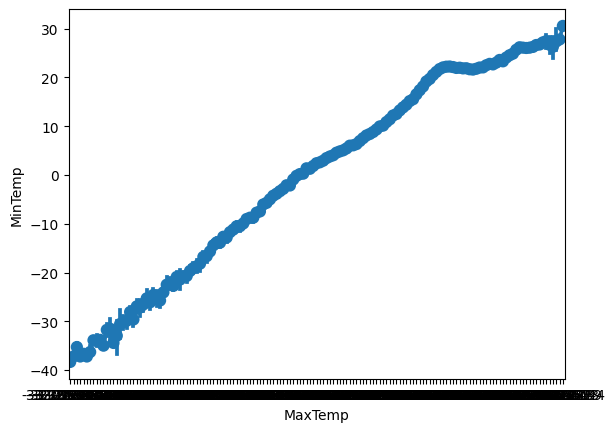

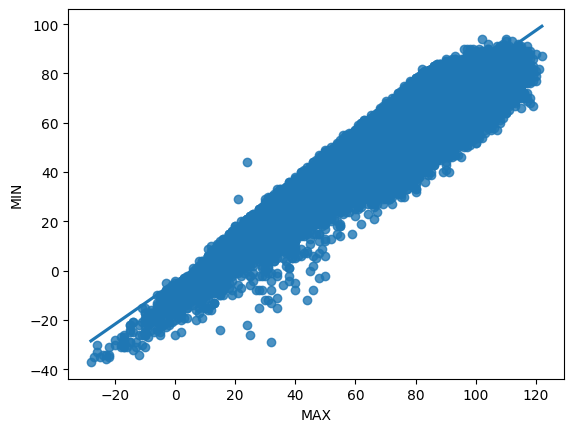

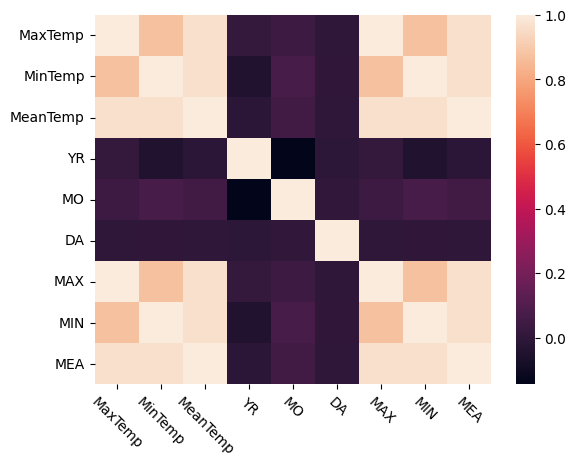

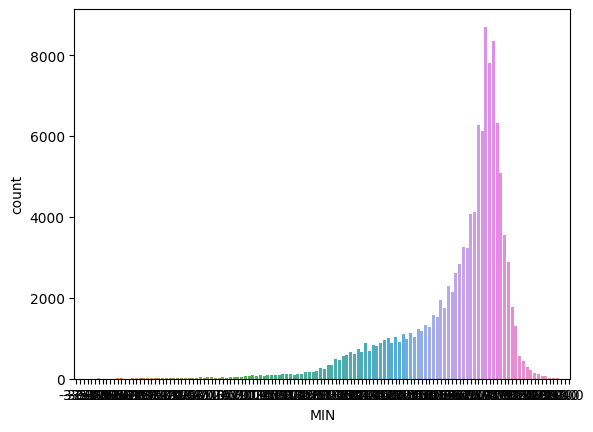

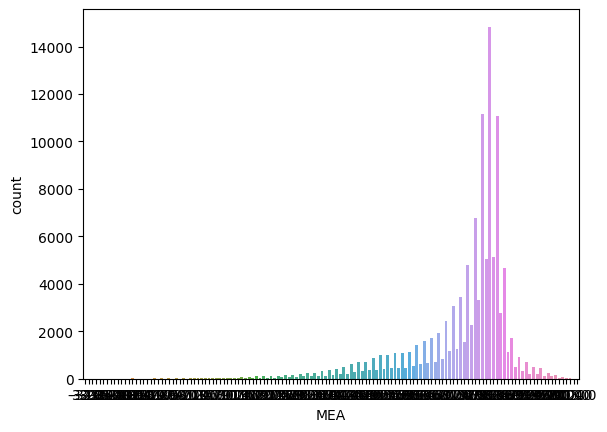

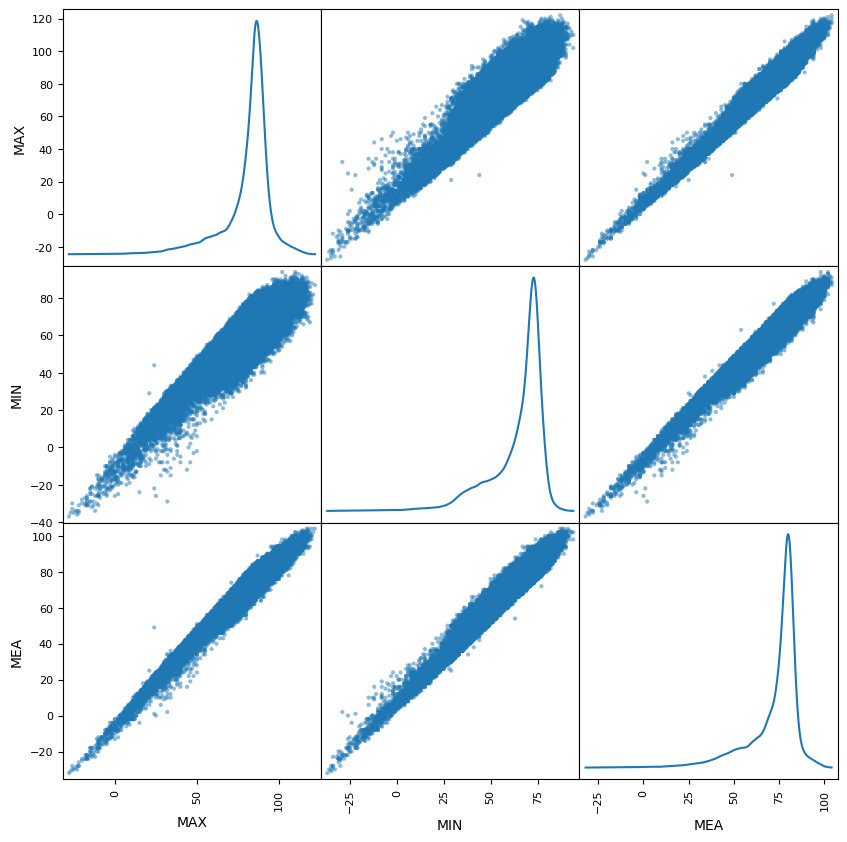

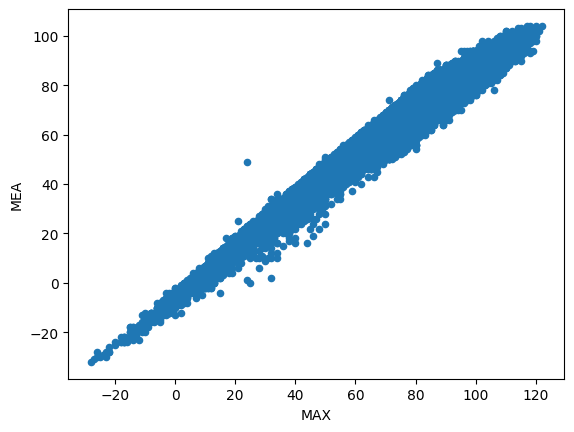

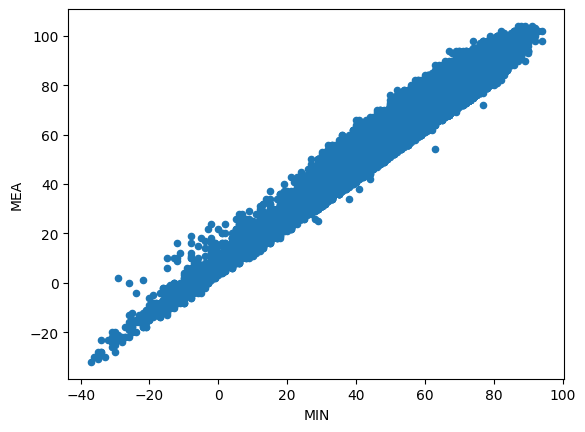

In [3]:
# Visualize the data
sns.distplot(climate['MaxTemp'], kde=False)
plt.show()

sns.barplot(x='MaxTemp', y='MinTemp', data=climate, palette='PuRd')
plt.show()

sns.countplot(x='MAX', data=climate, palette='magma')
plt.title('Weather')
plt.show()

sns.pointplot(x='MaxTemp', y='MinTemp', data=climate)
plt.show()

sns.regplot(x='MAX', y='MIN', data=climate)
plt.show()

sns.heatmap(climate.corr())
plt.xticks(rotation=-45)
plt.show()

sns.countplot(x='MIN', data=climate)
plt.show()

sns.countplot(x='MEA', data=climate)
plt.show()

cols = ['MAX', 'MIN', 'MEA']
pd.plotting.scatter_matrix(climate[cols], figsize=(10, 10), diagonal='kde')
plt.show()

climate.plot.scatter(x='MAX', y='MEA')
plt.show()

climate.plot.scatter(x='MIN', y='MEA')
plt.show()

In [4]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

y = climate['MaxTemp']
X = climate.drop(columns=['MaxTemp'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Importing linear regression model from sklearn to train the simple regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediction of the results
y_pred = regressor.predict(X_test)
print(y_pred)

# Accuracy score
accuracy = r2_score(y_test, y_pred)
print(accuracy)

[26.66666667 29.44444444 18.88888889 ... 27.77777778 29.44444444
 28.88888889]
1.0


In [ ]:
# Polynomial Regression
# Importing PolynomialFeatures from sklearn.preprocessing to create polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Define the degree of the polynomial (you can adjust it as per your requirement)
poly_degree = 5
poly_features = PolynomialFeatures(degree=poly_degree)

# Transform the input features to create polynomial features for training data
X_train_poly = poly_features.fit_transform(X_train)

# Transform the input features to create polynomial features for test data
X_test_poly = poly_features.transform(X_test)

# Importing LinearRegression from sklearn to train the polynomial regression model
from sklearn.linear_model import LinearRegression
linreg_poly = LinearRegression()

# Fit the polynomial regression model on the training data
linreg_poly.fit(X_train_poly, y_train)

# Predict on test data using the trained polynomial regression model
y_pred_poly = linreg_poly.predict(X_test_poly)

# Evaluate the polynomial regression model using RMSE and R2 score
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression RMSE Score: {:.2f}".format(rmse_poly))
print("Polynomial Regression R2 Score: {:.2f}".format(r2_poly))

In [ ]:
# Plot the original data and the polynomial regression line
plt.scatter(X_train, y_train, s=50)
# Sort the values of X_train before plotting the polynomial regression line
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train, y_pred_poly), key=sort_axis)
X_train_sorted, y_pred_poly_sorted = zip(*sorted_zip)
plt.plot(X_train_sorted, y_pred_poly_sorted, color='m')
plt.xlabel("Temperature")
plt.ylabel("MaxTemp")
plt.title("Polynomial Regression Model")
plt.show()

In [ ]:
# Random Forest Regression
# Importing RandomForestRegressor from sklearn.ensemble for training the random forest model
from sklearn.ensemble import RandomForestRegressor

# Define the number of estimators (you can adjust it as per your requirement)
n_estimators = 5
rf_reg = RandomForestRegressor(n_estimators=n_estimators, random_state=0)

# Fit the random forest model on the training data
rf_reg.fit(X_train, y_train)

# Predict on training data using the trained random forest model
rf_predict = rf_reg.predict(X_train)

# Evaluate the random forest model using RMSE and R2 score on training data
rmse_rf = np.sqrt(mean_squared_error(y_train, rf_predict))
r2_rf = r2_score(y_train, rf_predict)
print("Random Forest RMSE Score: {:.2f}".format(rmse_rf))
print("Random Forest R2 Score: {:.2f}".format(r2_rf))

In [ ]:
# Plot the original data and the random forest regression line
plt.scatter(X_train, y_train, color="red")
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, rf_reg.predict(X_grid), color="b")
plt.xlabel("Temperature")
plt.ylabel("MaxTemp")
plt.title("Random Forest Model")
plt.show()